## Week7 LinearRegression

In week 7, we've covered:
* Basic machine learning concepts and workflow
* Linear regression
  
  
In this notebook,  we will work on the Boston housing dataset and build a linear regression model to predict value of houses. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week7_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [49]:
# TODO  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [50]:
# Upload housing.csv to your google Drive then read the data using pandas.

data = pd.read_csv('housing.csv')

# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

Boston housing dataset has 489 data points with 4 columns.


---
## 3. Explore Data

Familiarizing ourself with the data through an explorative process is a fundamental practice to help us better understand and justify our results.

In [51]:
# TODO: Get the first n rows of data
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [52]:
# TODO: Get a summary of the dataframe
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


array([[<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

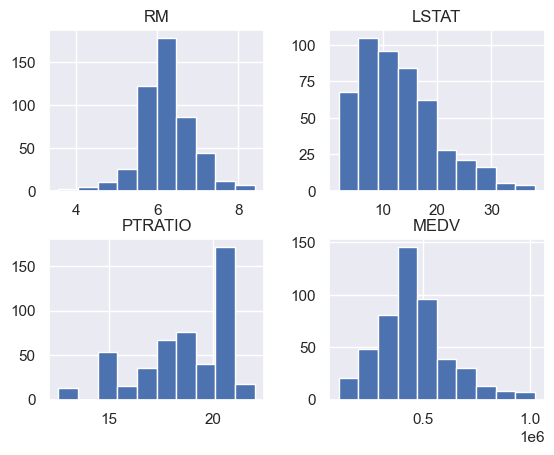

In [53]:
# TODO: Calculate descriptive statistics 
data.hist()

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

In [55]:
# TODO: Declare `features` and `target` variables
features_columns = ['RM', 'LSTAT','PTRATIO']
target_column = 'MEDV'

features = data[features_columns]
target = data[target_column]

Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

In [56]:
# TODO: Minimum price of the data
minimum_price = np.min(target)

# TODO: Maximum price of the data
maximum_price = np.max(target)

# TODO: Mean price of the data
mean_price = np.mean(target)

# TODO: Median price of the data
median_price = np.median(target)

# TODO: Standard deviation of prices of the data
std_price = np.std(target)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? 
  * Show the data using appropriate plot and justify your answer for each.

# About the data

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town (ie number of students per teacher)
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

**Answer**:    TODO  

RM = average number of rooms per dwelling
I would think that the higher the RM the Higher the MEDV

LSTAT =  % lower status of the population
I would think the higher the LSTAT the lower the MEDV

PTRATIO = pupil-teacher ratio by town (ie number of studens per teacher)
I honestly dont think it would affect. One assumption could be if there is more buying power there may be parents paying for at home classes. Or more money going to the schools which allows the schools to hire more teachers. So the lower the PTRATIO the higher the MEDV

Text(0, 0.5, 'RM - average number of rooms per dwelling')

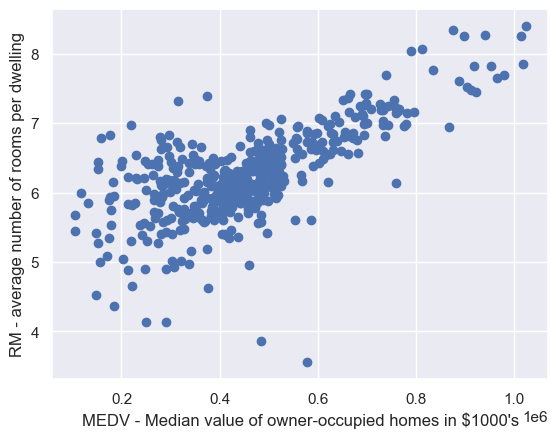

In [57]:
# TODO  
plt.scatter(target, features['RM'])
plt.xlabel("MEDV - Median value of owner-occupied homes in $1000's")
plt.ylabel("RM - average number of rooms per dwelling")

Text(0, 0.5, 'LSTAT - % lower status of the population')

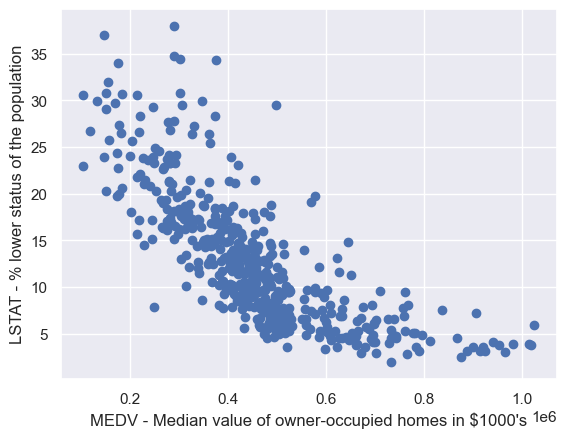

In [58]:
plt.scatter(target, features['LSTAT'])
plt.xlabel("MEDV - Median value of owner-occupied homes in $1000's")
plt.ylabel("LSTAT - % lower status of the population")

Text(0, 0.5, 'PTRATIO  pupil-teacher ratio by town (ie number of students per teacher)')

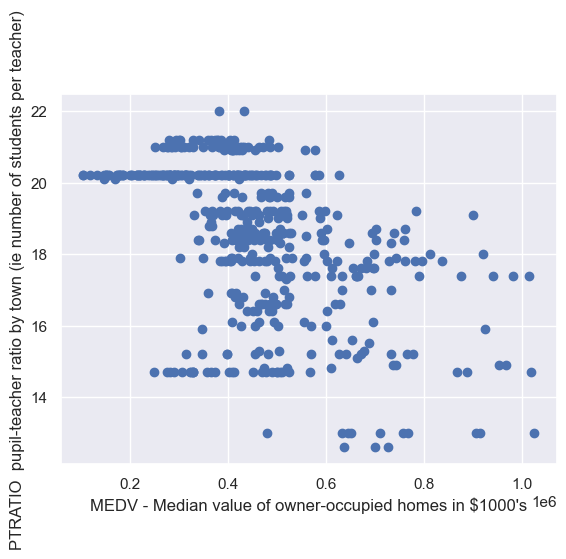

In [59]:
plt.scatter(target, features['PTRATIO'])
plt.xlabel("MEDV - Median value of owner-occupied homes in $1000's")
plt.ylabel("PTRATIO  pupil-teacher ratio by town (ie number of students per teacher)")

----

## 4. Develop Model

Split data to get training and testing Data.

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [68]:
features_columns
data[features_columns]

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


In [76]:
# TODO
# Split train and test (test_size=0.2, random_state=42)
# Feature scaling

#Split Data
train, test= train_test_split(data, test_size=0.2, random_state=42)

#Scale data
scaler = StandardScaler()


scaler.fit(data[features_columns])
train_scaled = scaler.transform(train[features_columns])
test_scaled = scaler.transform(test[features_columns])

**Answer**:    TODO 
Is the process of transforming the data into the same scale

After scaling we get a distribution with mean of 0 and standard deviation of 1

This ensure the model treats the variables equally and is more easy to make sense of the data

Create linear regression object

In [77]:
# TODO 
lm = LinearRegression()

Train/fit **lm** on the training data.

In [78]:
# TODO  
lm.fit(train_scaled, train[target_column])

LinearRegression()

Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [86]:
# TODO
lm_summary = pd.DataFrame(data=features_columns, columns=['Features'])
lm_summary['Coefficients'] = lm.coef_
lm_summary['P-Value'] = f_regression(train_scaled, train[target_column])[1].round(20)
lm_summary.sort_values(by=['Coefficients'])
# since all the p values are < 0.05 all these variables are meaningful for the prediction

,Features,Coefficients,P-Value
1,LSTAT,-75138.298457,0.0
2,PTRATIO,-40757.261349,0.0
0,RM,56147.416993,0.0


## 5. Make Prediction

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict house prices for **X_test** data set.

In [88]:
# TODO
test_prediction = lm.predict(test_scaled)

Create a scatterplot of **y_test** versus the predicted values.

Text(0, 0.5, 'MEDV - Lineal Model Predicted')

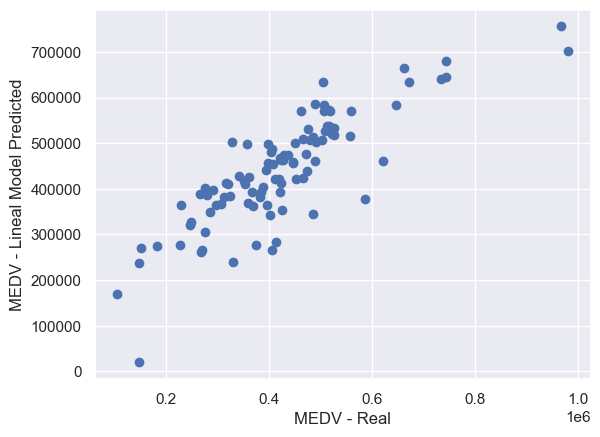

In [92]:
# TODO
plt.scatter(test[target_column],test_prediction)
plt.xlabel("MEDV - Real")
plt.ylabel("MEDV - Lineal Model Predicted")

## 6. Evaluate Model

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 

Let's evaluate the model performance by calculating the Adjusted $R^2$.  

What's the benefit of using Adjusted $R^2$ versus $R^2$?

**Answer**:    

Measures the goodness of fit

Adjusted R^2 is a more appropiate measure for multiple linear requresson, adjust for the number of variables in the model. The adjusted R^2 penalizes the use of variables/features that do not explain the target 

Now calculate Adjusted $R^2$ for train set and test set. Hint: $R^2_{adj.}=1-(1-R^2)*\frac{n-1}{n-p-1}$

In [101]:
# TODO  
r_squared = lm.score(train_scaled, train[target_column])
n = 391 # number of observations (based on the train data) since we used it on the train
p = 3 # number of predictors 'RM', 'LSTAT', and 'PTRATIO'

r_squared_adjusted = 1-(1-r_squared)*((n-1)/(n-p-1))
print(f"r^2: {r_squared} adjusted r^2:{r_squared_adjusted}")

r^2: 0.7194530968926247 adjusted r^2:0.717278314697994


## NOTE
if the adjusted r^2 is significantly lower than the r^2 we can conclude that one of the features selected has little or no explanatory power. On our case I see them similar so we could conclude that the variables selected do have explanatory power

## THE END, WELL DONE!

## Submission

Download completed **Week7_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.